In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Use pandas to read driver-data.csv 
df=pd.read_csv('driver-data.csv')
df.head(5)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
df_analyze = df.drop('id',axis=1)

The most crucial aspect of K-Means clustering is deciding the value of K. We do this by performing **Elbow Analysis**

In [6]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_analyze)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

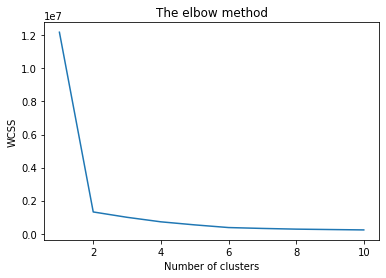

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [8]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id',axis=1)
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Q1. What are the cluster center vectors?

In [9]:
print("Cluster centers: \n",kmeans.cluster_centers_)
print ("Cluster labels: ",kmeans.labels_)
print ("Total cluster labels: ",len(kmeans.labels_))

Cluster centers: 
 [[ 50.04763437   8.82875   ]
 [180.017075    18.29      ]]
Cluster labels:  [0 0 0 ... 1 1 1]
Total cluster labels:  4000


#### Q2. How many drivers are there in 1st and 2nd Cluster?

In [10]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


#### Q3. What is the inference you can draw from the clustering?

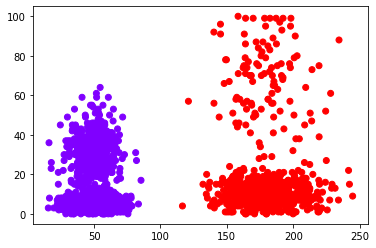

In [11]:
plt.scatter(df_analyze['mean_dist_day'], df_analyze['mean_over_speed_perc'], c = kmeans.labels_, cmap ='rainbow')

#### Q4. What are the cluster center vectors? <br> Q5. How many drivers are there in each of 4 Cluster?

In [12]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))
kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.46127059  32.42823529]]
{0: 2775, 1: 696, 2: 104, 3: 425}


#### Q6. What is the inference you can draw from the clustering? 

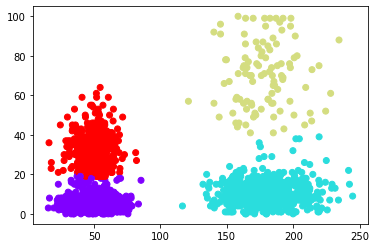

In [13]:
plt.scatter(df_analyze['mean_dist_day'], df_analyze['mean_over_speed_perc'], c = kmeans_4.labels_, cmap ='rainbow') 